# Kaggle Titanic Survivals

This is my first kernel in Kaggle. The goal of this project is to achieve more than 80% on accurracy of a given passanger has survivied or deceased. In this kernel I'm gonna use Support Vector Machines (http://scikit-learn.org/stable/modules/svm.html) as approach to solve this problem.

In [1]:
# Importing libraries to play with data
import numpy as np
import pandas as pd

In [2]:
# Importing the data itself
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

With the data imported, I want to take a look at it, see the information and the first rows

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Learning with the data
First I will follow my intuition and see if women and children have more chances of survival.

In [7]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

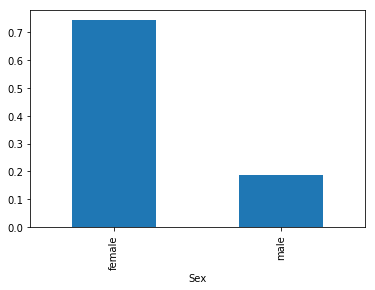

In [8]:
train_set.groupby('Sex').Survived.mean().plot(kind='bar')

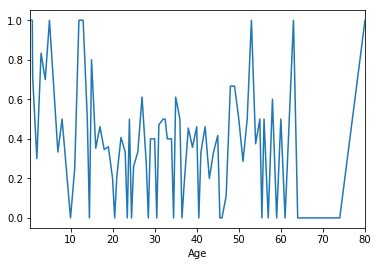

In [9]:
train_set.groupby('Age').Survived.mean().plot(kind='line')

As we predicted, we have a good rate of survivals amog females and childrens. Let's see if that's enough.

## Setting a Support Vector Machine
Before we start, we have to standartize the data, such as Age and Sex. For the Sex it's just transform 'male' and 'female' into 0 and 1. For the age, we are going to round and predict the Null ones. We are already using a Support Vector Machine to make the Age prediction, but we will explain later.

In [10]:
# Transforming the Sex into 0 and 1
train_set['Sex'] = train_set['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [11]:
# Rounding the Age
train_set['Age'] = train_set.Age.round()

In [12]:
# Separating the data to predict the missing ages
X_train = train_set[train_set.Age.notnull()][['Pclass','Sex','SibSp','Parch', 'Fare']]
X_test = train_set[train_set.Age.isnull()][['Pclass','Sex','SibSp','Parch', 'Fare']]
y = train_set.Age.dropna()

In [13]:
# Predicting the missing ages
from sklearn.svm import SVC

age_classifier = SVC()
age_classifier.fit(X_train, y)
prediction = age_classifier.predict(X_test)
agePrediction = pd.DataFrame(data=prediction,index=X_test.index.values,columns=['Age'])
train_set = train_set.combine_first(agePrediction)

In [14]:
# Just confirming if there is no more ages missing
train_set.Age.isnull().sum()

0

## Predicting with Age and Sex
Now we have our data set and our intuition proved in the graphs, let's see how well these feature goes with the SVM. In the code below, we separete the train set given into another training set and a test set with only the Sex and Age features 

In [15]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = train_set[['Sex', 'Age']]

# Taking the labels (Survived or Not Survived)
Y = train_set['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 2 columns):
Sex    712 non-null int64
Age    712 non-null float64
dtypes: float64(1), int64(1)
memory usage: 16.7 KB


Just seeing if everything gone right

In [17]:
X_train.head()

,Sex,Age
140,1,24.0
439,0,31.0
817,0,31.0
378,0,20.0
491,0,21.0


In [18]:
len(Y_train)

712

In [19]:
Y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

### Coding a Support Vector Machine
Here we are in fact using a SVM to make prediction on our data. Sickit-learn has some SVMs to use, for this project I choosen C-Support Vector Classification (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) because I think it's simpler. I will not tune it for now and see how it will go.

In [20]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.787709497207


78.77% in the first shot! I'm surprised! We are very close to our goal.

## Predicting with Class
Now, we have to get a little better to achieve 80% of accuracy. For second intuition, I think that the richest people got better than the poorer, because, you know, that's how the world is. Let's take a look into the data.

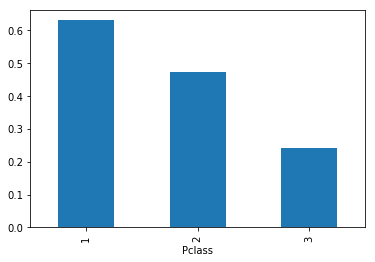

In [21]:
train_set.groupby('Pclass').Survived.mean().plot(kind='bar')

Yep. More than 60% of the people in the First class make it. Let's see these numbers among females.

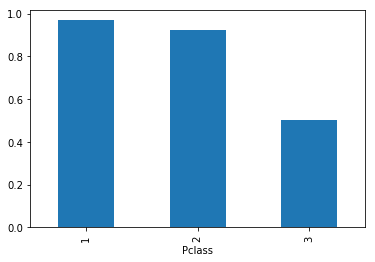

In [22]:
train_set.query('Sex == 1').groupby('Pclass').Survived.mean().plot(kind='bar')

Wow! Almost every women in the First class, make it! We are definitely in the right direction. Let's put it in our Support Vector machine and see how it goes.

In [23]:
# Taking only the features that is important for now
X = train_set[['Sex', 'Age', 'Pclass']]

# Taking the labels (Survived or Not Survived)
Y = train_set['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.810055865922


Yay! We make it! With only three features we got an accuracy of more than 80%! Awesome.

# Conclusion
With this notebook our goal is to achive 80% of accuracy predicting the survivals of the Titanic disaster and we did it. Also we could see the power and simplicity of Support Vector Machines, with simple and few line of codes we could achieve our goal. For this is a well known fact, I, as anyone, could explore with intuition. It's obvious that children and women from upper class have more chances to survive, but the SVC did a great job classifying tham. Hope you enjoyed.

## Appendix
Now let's generate the data to send to the contest. For this, we are going to do the same settings we did with `train_set` but now with the `test_set`

In [25]:
# Transforming the Sex into 0 and 1
test_set['Sex'] = test_set['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [26]:
# Rounding the Age
test_set['Age'] = test_set.Age.round()

In [27]:
# Separating the data to predict the missing ages
X_train = test_set[test_set.Age.notnull()][['Pclass','Sex','SibSp','Parch']]
X_test = test_set[test_set.Age.isnull()][['Pclass','Sex','SibSp','Parch']]
y = test_set.Age.dropna()

In [28]:
age_classifier = SVC()
age_classifier.fit(X_train, y)
prediction = age_classifier.predict(X_test)
agePrediction = pd.DataFrame(data=prediction,index=X_test.index.values,columns=['Age'])
test_set = test_set.combine_first(agePrediction)

Now we will use the SVM to predict and after that, generate the CSV

In [29]:
to_predict = test_set[['Sex', 'Age', 'Pclass']]
predictions = classifier.predict(to_predict)

dfPrediction = pd.DataFrame(data=predictions,index = test_set.PassengerId.values,columns=['Survived'])
contest_output = dfPrediction.to_csv('contest_output.csv')